In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# os.getcwd()

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# From 02-data-preparation.ipynb
df = pd.read_csv(filepath_or_buffer="../data/cardataset/data.csv", header=0, sep=",")

df.columns = df.columns.str.lower().str.replace(pat=' ',repl='_')

cols = df.dtypes[df.dtypes=='object'].index
for col in cols:
    df[col] = df[col].str.lower().str.replace(pat=' ',repl='_')

print(df.shape)
display(df.head())

(11914, 16)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [6]:
# Unique values for each col in the dataset
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

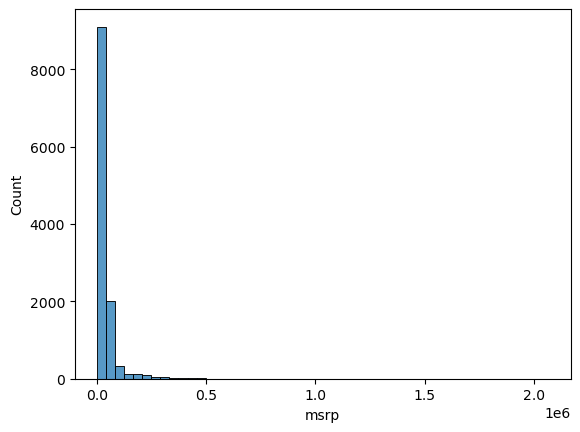

In [7]:
# Distribution of the target variable - msrp
sns.histplot(df['msrp'], bins=50)
# The target variable has a long-tail distribution, i.e., there are a very few cars for which we have high msrp

<Axes: xlabel='msrp', ylabel='Count'>

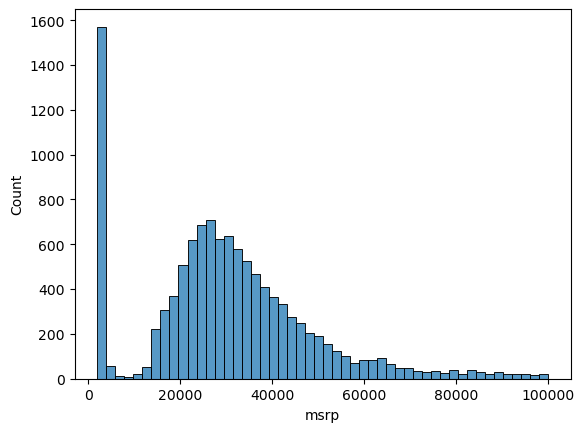

In [ ]:
# We check the frequency distribution of cars which have less than 100000 msrp - we observe that our assumption about the long-tail distribution is indeed true
sns.histplot(df.loc[df['msrp'] < 100000, 'msrp'], bins=50)

In [ ]:
# we can perform a log transformation to put msrp on a log scale to reduce the range of the msrp values and thereby, obtaining a better (normal) distribution to work with
log_msrp = np.log1p(df['msrp'])
stats.anderson(log_msrp) # test of normality for sample size > 5000 - for < 5000, we can go for Shapiro-Wilk test

AndersonResult(statistic=np.float64(767.1490539418155), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(10.113728867451629), scale=np.float64(1.1057031634834569))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

<Axes: xlabel='msrp', ylabel='Count'>

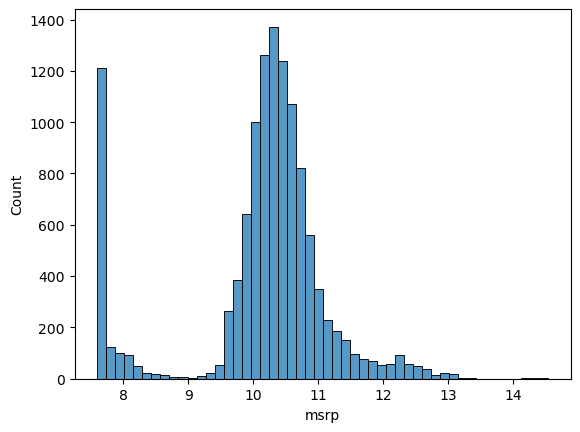

In [19]:
sns.histplot(log_msrp, bins=50) # we use log1p adds 1 to each value to handle the cases where the value is 0, for which the log is undefined otherwise
# np.log1p([0, 1, 10, 100, 1000]) = np.log([0+1, 1+1, 10+1, 100+1, 1000+1])

In [22]:
# Observe missing values - handled during data pre-processing
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64